In [1]:
import pandas
import requests
import sklearn
import matplotlib as plt
import seaborn as sns

In [2]:
data=pandas.read_csv('spotify_data.csv')

In [3]:
data.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [4]:
data.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,6.590613e+05,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,2.495618e+05,3.885879e+00
std,4.285492e+05,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,1.494262e+05,4.676967e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.899408e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,1.810910e+05,4.000000e+00
50%,5.798815e+05,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257440e+05,4.000000e+00
75%,1.031689e+06,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869135e+05,4.000000e+00
max,1.473395e+06,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [5]:
popularity_buckets=[85,60,40,0]

In [6]:
def make_buckets(popularity):
    for ind,i in enumerate(popularity_buckets):
        if popularity>=i:
            return ind+1
    return len(popularity_buckets)

In [7]:
data['pop_bucket']=data['popularity'].apply(make_buckets)

In [8]:
data.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pop_bucket
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,...,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,2
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,...,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,3
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,...,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,3
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,...,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,3
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,...,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,3


In [9]:
data.sort_values(by='pop_bucket').head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pop_bucket
817977,952551,Eminem,Mockingbird,561jH07mF1jHuk7KlaeF0s,90,2004,hip-hop,0.637,0.678,0,...,1,0.2660,0.209,0.000000,0.1560,0.254,84.039,250760,4,1
264770,264770,Shawn Mendes,There's Nothing Holdin' Me Back,7JJmb5XwzOO8jgpou264Ml,85,2017,dance,0.866,0.813,11,...,0,0.0554,0.380,0.000000,0.0779,0.969,121.998,199440,4,1
569194,569194,Stephen Sanchez,Until I Found You (with Em Beihold) - Em Beiho...,1Y3LN4zO1Edc2EluIoSPJN,91,2022,pop,0.551,0.550,10,...,1,0.0286,0.777,0.000000,0.2020,0.342,101.190,176440,3,1
569195,569195,Manuel Turizo,La Bachata,5ww2BF9slyYgNOk37BlC4u,93,2022,pop,0.835,0.679,7,...,0,0.0364,0.583,0.000002,0.2180,0.850,124.980,162638,4,1
569196,569196,Harry Styles,Late Night Talking,1qEmFfgcLObUfQm0j1W2CK,87,2022,pop,0.714,0.728,10,...,1,0.0468,0.298,0.000000,0.1060,0.901,114.996,177955,4,1


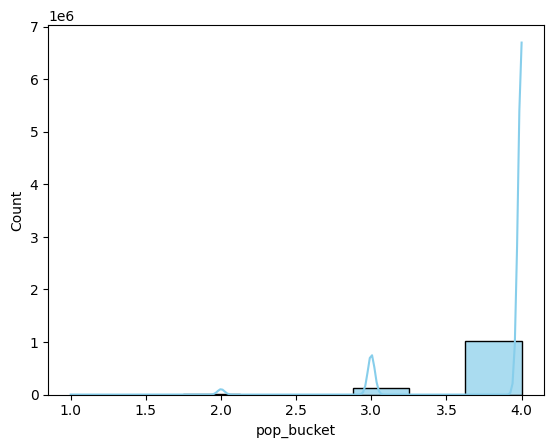

In [10]:
pop_dist=sns.histplot(data['pop_bucket'], kde=True, bins=8, color="skyblue", edgecolor="black", alpha=0.7)

Distribution leans heavily towards lower popularities (3 and 4)

In [11]:
data['pop_bucket'].value_counts()

pop_bucket
4    1026388
3     117426
2      15845
1        105
Name: count, dtype: int64

Downsampling can help level out distribution since we have over 1,000,000 data points (although this is more for performance than anything)

In [12]:
bucket_4_sample=data[data['pop_bucket']==4].sample(frac=0.2)
downsampled=pandas.concat([bucket_4_sample,data[data['pop_bucket']!=4]])

In [13]:
downsampled['pop_bucket'].value_counts()

pop_bucket
4    205278
3    117426
2     15845
1       105
Name: count, dtype: int64

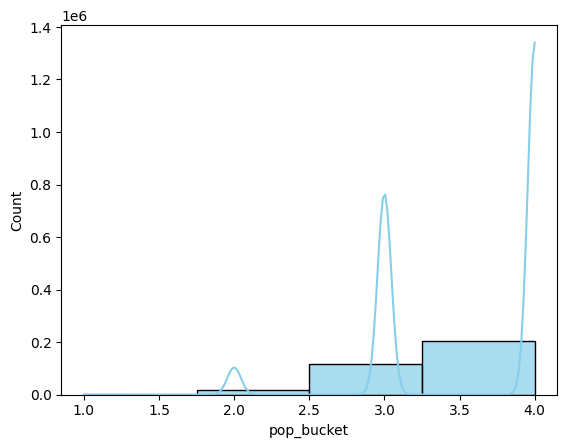

In [14]:
pop_dist=sns.histplot(downsampled['pop_bucket'], kde=True, bins=4, color="skyblue", edgecolor="black", alpha=0.7)

In [16]:
pop_dist.get_figure().savefig('dist.png')

In [17]:
from pytrends.request import TrendReq

In [18]:
len(pandas.unique(data['artist_name']))

64159

In [19]:
data['year'].min()

2000

In [ ]:
pytrend = TrendReq(hl='en-US', tz=360)
keywords = list(pandas.unique(data['artist_name']))
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe = '2005-01-01 2023-06-21',
     geo='',
     gprop='')
trend_data = pytrend.interest_over_time()

Trends data won't work because it gives a number relative to all time searches and not a number. All the tools that give an actual number of searches are expensive!!

In [17]:
import dotenv
import os

In [18]:
dotenv.load_dotenv()
client_id=os.getenv('client_id')
secret_id=os.getenv('secret_id')

In [19]:
def get_spotify_token():
    token_request=requests.post("https://accounts.spotify.com/api/token",
                                headers={"Content-Type": "application/x-www-form-urlencoded"},
                                data=f"grant_type=client_credentials&client_id={client_id}&client_secret={secret_id}"
)
    return token_request.json()['access_token']

In [43]:
access=get_spotify_token()

In [44]:
import time

In [31]:
track_queries=[]
count=0
query=''
for row in downsampled['track_id']:
    if count>=50:
        track_queries.append(query[:-1])
        query=''
        count=0
    query+=f"{row}%"
    count+=1

In [45]:
requests.get(f"https://api.spotify.com/v1/tracks?ids={track_queries[0]}",headers={"Authorization": f"Bearer {access}"}).status_code

429

In [ ]:
release_dates=[]
for ids in track_queries:
    tracks_response=requests.get(f"https://api.spotify.com/v1/tracks?ids={ids}",headers={"Authorization": f"Bearer {access}"}).json()
    for track in tracks_response['tracks']:
        release_dates.append(track['album']['release_date'])

if len(release_dates)==len(downsampled['year']):
    downsampled['release_date']=release_dates

In [52]:
def get_season(date):
    try:
        month=int(date.split('-')[1])
        if month<=2 or month==12:
            return 'Winter'
        if month<=5:
            return 'Spring'
        if month<=10:
            return 'Summer'
        return 'Fall'
    except:
        return ''
    

In [ ]:
downsampled['season']=downsampled['release_date'].apply(get_season)

In [46]:
len(downsampled['track_id'])

338654

In [47]:
min(downsampled['year'])

2000

In [50]:
max(downsampled['year'])

2023

In [48]:
downsampled['decade']=downsampled['year'].apply(lambda x:'2000s' if x<2010 else '2010s' if x<2020 else '2020s')

In [49]:
downsampled.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pop_bucket,decade
1044,1044,Menahan Street Band,Seven Is the Wind,5qh2fad21W9se0d4IpKcyi,22,2012,afrobeat,0.525,0.577,3,...,0.0334,0.223,0.877000,0.1850,0.391,78.298,308693,4,4,2010s
1130163,1424053,Flatsound,We'll Live,1XuAT2hAkjDvGqd4MMv2wL,16,2011,emo,0.339,0.624,1,...,0.0441,0.804,0.000004,0.1030,0.345,120.558,132056,4,4,2010s
927251,1121151,Subhira,Ruta del Inca,0ID7odbzAGY7C9cP2PzLRX,0,2007,afrobeat,0.552,0.766,11,...,0.0364,0.015,0.842000,0.1110,0.266,119.998,203360,4,4,2000s
275932,275932,Scary Pockets,Wonderwall,120tmueqvWTGdHET4u5sPP,36,2017,funk,0.756,0.732,2,...,0.0748,0.181,0.000122,0.1900,0.958,82.891,222000,4,4,2010s
834627,981623,Pain of Salvation,Iter Impius,12kxpEvK9B99z02rNRmnSF,26,2004,swedish,0.437,0.584,2,...,0.0329,0.386,0.000000,0.0916,0.188,135.836,381000,4,4,2000s


In [51]:
downsampled.to_csv('spotify_cleaned.csv')